In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import lena
from scipy.ndimage.filters import convolve
import scipy.ndimage as nd

# Q1

In [3]:
single_dot = np.zeros((101, 101))
single_dot[50, 50] = 1.0
gauss_kernel = nd.gaussian_filter(single_dot, 10)

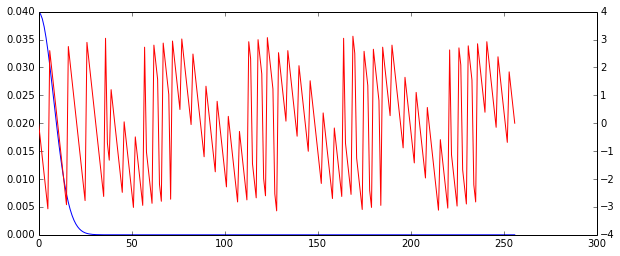

In [4]:
plt.plot(abs(np.fft.rfft(gauss_kernel[:, 50], n=512))) # only real part, so ~256
plt.twinx() # two y-axis

plt.plot(np.angle(np.fft.rfft(gauss_kernel[:, 50], n=512)), 'r')
plt.gcf().set_figwidth(10)

# Q2

In [5]:
src_image = lena()

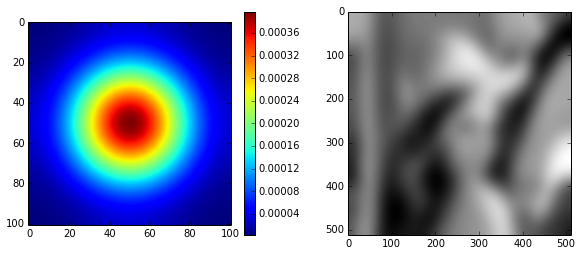

In [14]:
single_dot = np.zeros((101, 101))
single_dot[50, 50] = 1.0
gauss_kernel = nd.gaussian_filter(single_dot, 20)
plt.subplot(121)
plt.imshow(gauss_kernel)
plt.colorbar()

gauss_blur = convolve(src_image, gauss_kernel)
plt.subplot(122)
plt.imshow(gauss_blur, cmap=plt.cm.gray)

plt.gcf().set_figwidth(10)

# Q3

In [29]:
def imshow2(image):
    plt.imshow(image, cmap=plt.cm.gray)

src_image_eyes = src_image[150:300, 100:400]

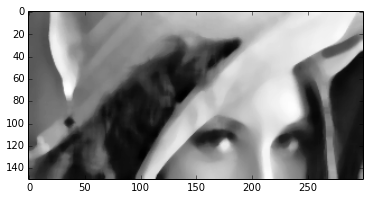

In [28]:
meye = nd.median_filter(src_image_eyes, size=10) # larger num more blur
imshow2(meye)

# Q4

    大於where條件值 = x
    小於where條件值 = y
    / 255.0 原因是讓眼睛圖和雜訊圖在同樣的比例上

In [51]:
noise = np.where(np.random.random(src_image_eyes.shape) > 0.9, 0.5, 0)
noisy_image = (src_image_eyes/255.0) + noise

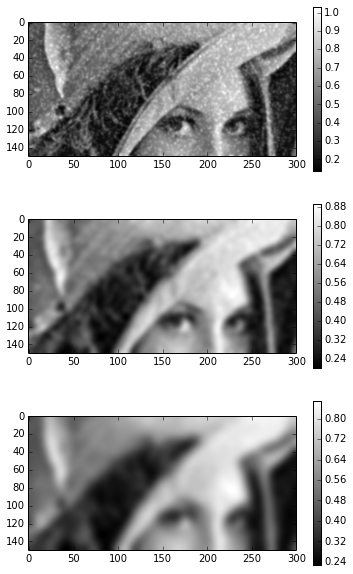

In [74]:
plt.subplot(311)
imshow2(nd.gaussian_filter(noisy_image, 1))
plt.colorbar()

plt.subplot(312)
imshow2(nd.gaussian_filter(noisy_image, 3))
plt.colorbar()

plt.subplot(313)
imshow2(nd.gaussian_filter(noisy_image, 5))
plt.colorbar()

plt.gcf().set_figheight(10)

# Q5

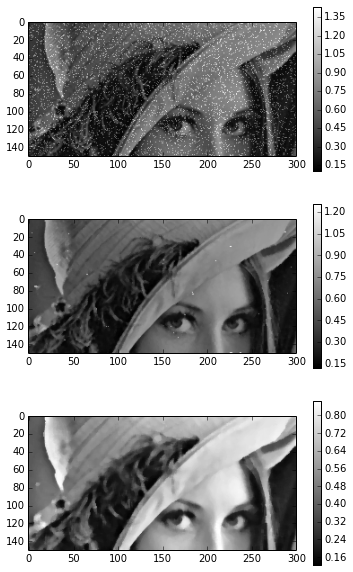

In [75]:
plt.subplot(311)
imshow2(nd.median_filter(noisy_image, 1))
plt.colorbar()

plt.subplot(312)
imshow2(nd.median_filter(noisy_image, 3))
plt.colorbar()

plt.subplot(313)
imshow2(nd.median_filter(noisy_image, 5))
plt.colorbar()

plt.gcf().set_figheight(10)